In [136]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
# Create simple network with Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization

In [94]:
data = pd.read_csv('bank.csv')

In [95]:
data.head(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [96]:
#2.Drop the columns which are unique for all users like IDs (2.5 points)
data.drop(['CustomerId','RowNumber'],axis=1,inplace=True)

In [97]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


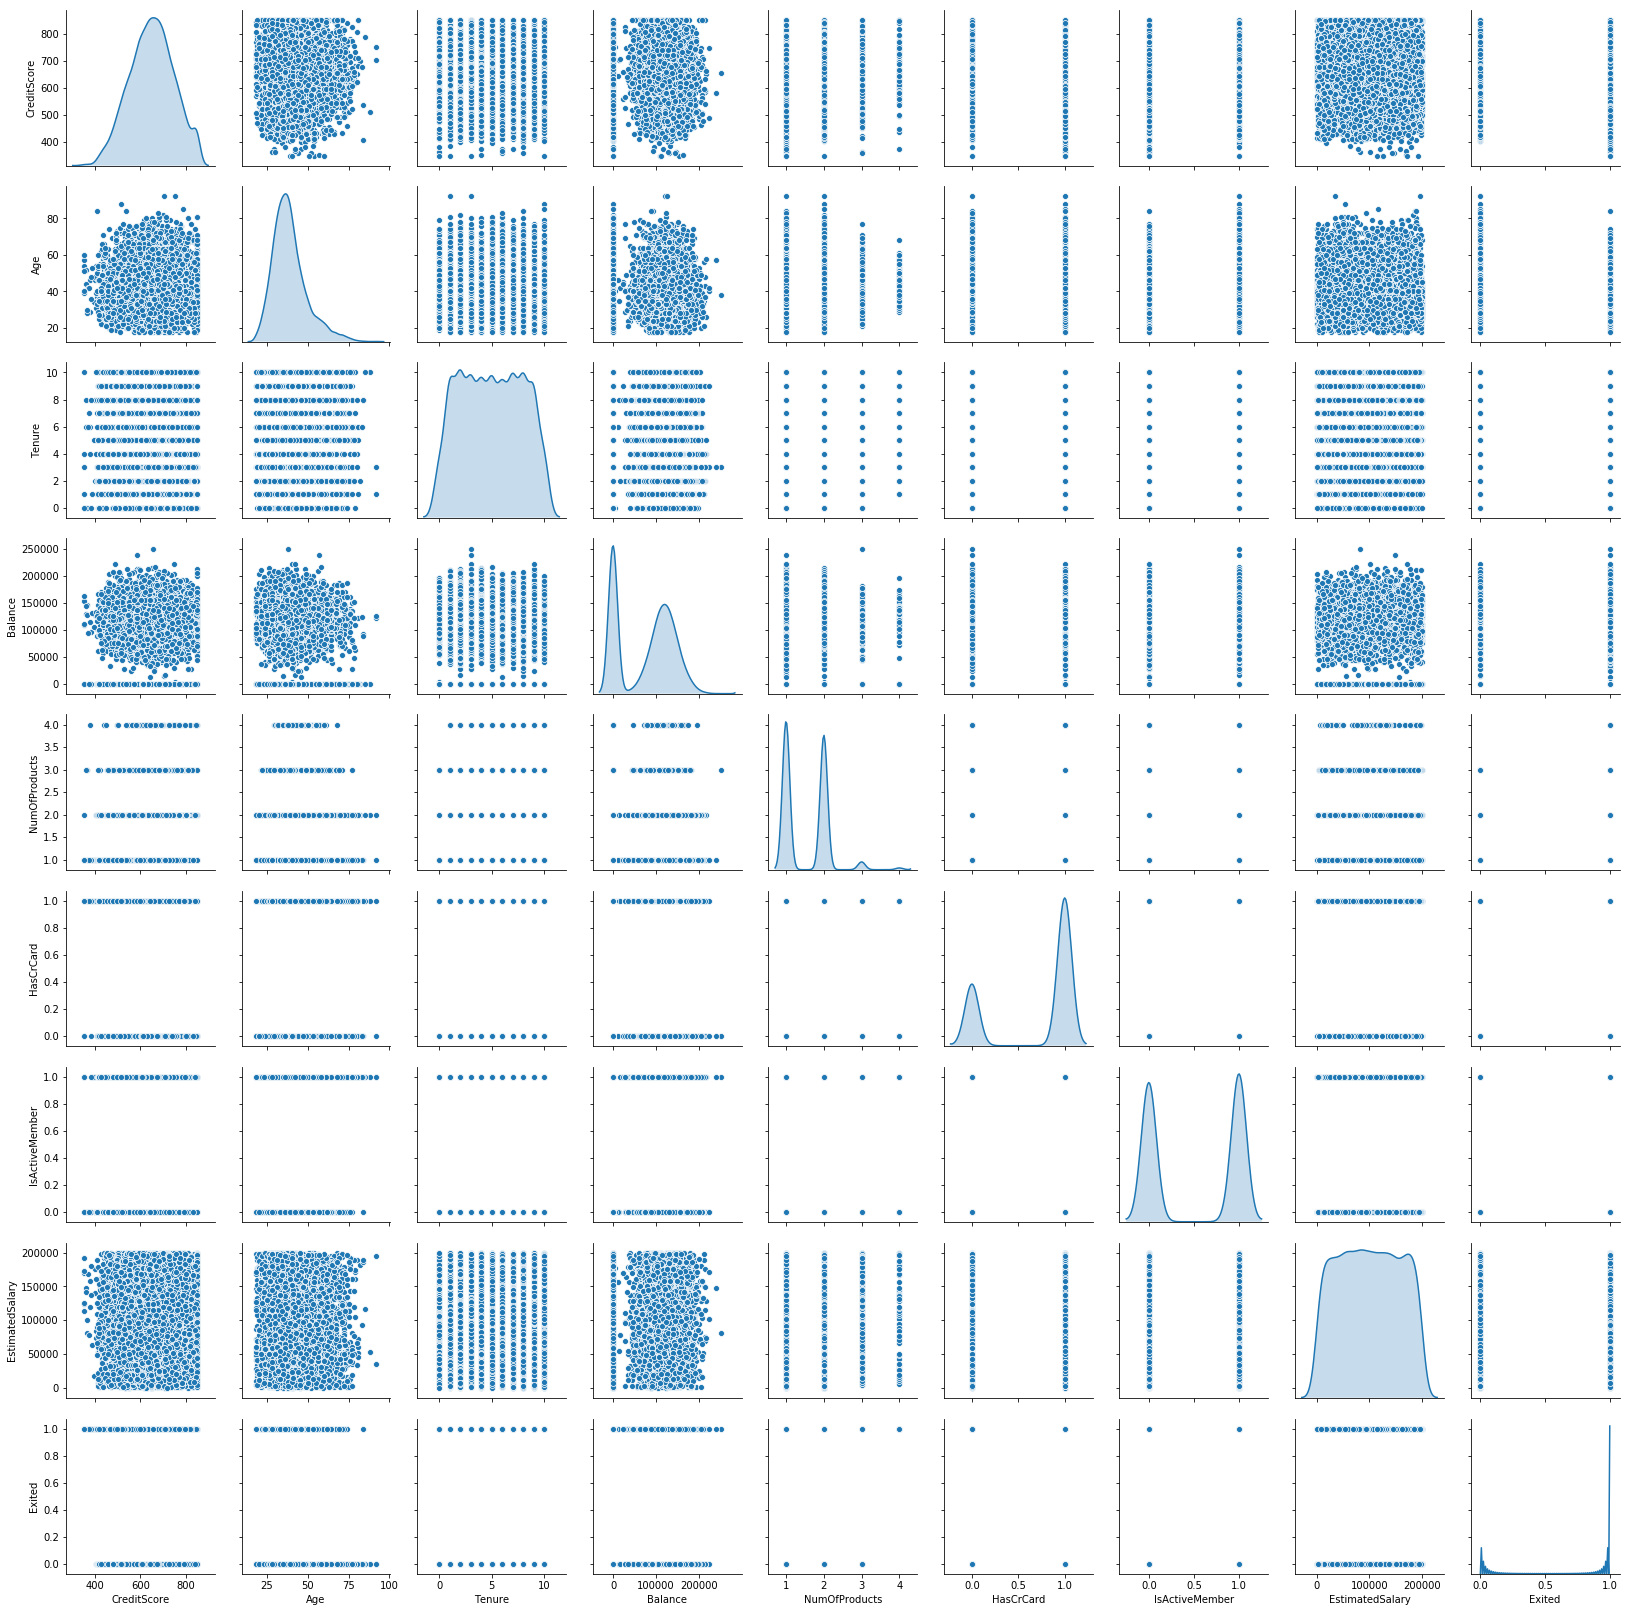

In [42]:
sns.pairplot(data,diag_kind='kde')

In [9]:
#data['Geography']=pd.factorize(data['Geography'],sort = True)[0]

In [99]:
#data['Gender']=pd.factorize(data['Gender'],sort = True)[0]
surname=data.pop('Surname')

In [100]:
data_new=pd.get_dummies(data.iloc[1:])

In [101]:
data_new.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
5,645,44,8,113755.78,2,1,0,149756.71,1,0,0,1,0,1
6,822,50,7,0.00,2,1,1,10062.80,0,1,0,0,0,1
7,376,29,4,115046.74,4,1,0,119346.88,1,0,1,0,1,0
8,501,44,4,142051.07,2,0,1,74940.50,0,1,0,0,0,1
9,684,27,2,134603.88,1,1,1,71725.73,0,1,0,0,0,1
10,528,31,6,102016.72,2,0,0,80181.12,0,1,0,0,0,1


In [102]:
#3.Distinguish the feature and target set (2.5 points)
y=data_new.iloc[:,-1]
x=data_new.iloc[:,0:-1]


In [103]:
x.shape

(9999, 13)

In [104]:
#4.Divide the data set into Train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=6)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(7999, 13) (7999,)
(2000, 13) (2000,)


In [105]:
#5.Normalize the train and test data (2.5 points)
from sklearn.preprocessing import Normalizer
X_train = Normalizer().fit_transform(X_train)
X_test = Normalizer().transform(X_test)

In [113]:
y_train=np.array(y_train)
type(y_train)

numpy.ndarray

In [146]:
#6. Initialize & build the model (10 points)
# Initialize the constructor
model_1 = Sequential()

# Add an input layer 
model_1.add(Dense(40,activation='relu'))

# Add an output layer 
model_1.add(Dense(1, activation='sigmoid'))

In [147]:
model_1.compile(optimizer='sgd', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [148]:
model_1.fit(X_train, y_train, epochs=10)

Epoch 1/10
7999/7999 [==============================] - 1s 104us/step - loss: 0.6926 - acc: 0.5187
Epoch 2/10
7999/7999 [==============================] - 0s 37us/step - loss: 0.6902 - acc: 0.5409
Epoch 3/10
7999/7999 [==============================] - 0s 37us/step - loss: 0.6900 - acc: 0.5439
Epoch 4/10
7999/7999 [==============================] - 0s 32us/step - loss: 0.6898 - acc: 0.5439
Epoch 5/10
7999/7999 [==============================] - 0s 34us/step - loss: 0.6898 - acc: 0.5439
Epoch 6/10
7999/7999 [==============================] - 0s 33us/step - loss: 0.6897 - acc: 0.5439
Epoch 7/10
7999/7999 [==============================] - 0s 34us/step - loss: 0.6897 - acc: 0.5439
Epoch 8/10
7999/7999 [==============================] - 0s 33us/step - loss: 0.6896 - acc: 0.5439
Epoch 9/10
7999/7999 [==============================] - 0s 33us/step - loss: 0.6896 - acc: 0.5439
Epoch 10/10
7999/7999 [==============================] - 0s 34us/step - loss: 0.6895 - acc: 0.5439


In [149]:
#7. Optimize the model (5 points)
#keras.layers.BatchNormalization()

model_2 = Sequential()

model_2.add(BatchNormalization())

# Add an input layer 
model_2.add(Dense(40,activation='relu'))

# Add one hidden layer 
model_2.add(Dense(18, activation='relu'))

# Add an output layer 
model_2.add(Dense(1, activation='sigmoid'))

In [150]:
model_2.compile(optimizer='sgd', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [151]:
model_2.fit(X_train, y_train, epochs=10)

Epoch 1/10
7999/7999 [==============================] - 1s 132us/step - loss: 0.6952 - acc: 0.5163
Epoch 2/10
7999/7999 [==============================] - 0s 39us/step - loss: 0.6898 - acc: 0.5441
Epoch 3/10
7999/7999 [==============================] - 0s 38us/step - loss: 0.6895 - acc: 0.5444
Epoch 4/10
7999/7999 [==============================] - 0s 43us/step - loss: 0.6893 - acc: 0.5446
Epoch 5/10
7999/7999 [==============================] - 0s 38us/step - loss: 0.6894 - acc: 0.5442
Epoch 6/10
7999/7999 [==============================] - 0s 41us/step - loss: 0.6894 - acc: 0.5439
Epoch 7/10
7999/7999 [==============================] - 0s 37us/step - loss: 0.6893 - acc: 0.5441
Epoch 8/10
7999/7999 [==============================] - 0s 42us/step - loss: 0.6893 - acc: 0.5441
Epoch 9/10
7999/7999 [==============================] - 0s 38us/step - loss: 0.6892 - acc: 0.5442
Epoch 10/10
7999/7999 [==============================] - 0s 38us/step - loss: 0.6894 - acc: 0.5444


In [178]:
# 8 .Predict the results using 0.5 as a threshold (5 points)
pred = model_2.predict(X_test)
pred_new=[]
for i in range(len(pred)):
    if pred[i][0]>0.5:
        pred_new.append(1)
    else:
        pred_new.append(0)


In [181]:
result=pd.DataFrame()
result['observed']=y_test
result['predicted']=pred_new
result.head(20)

,observed,predicted
740,0,1
3972,0,1
1111,1,1
3597,0,1
3609,1,1
8531,1,1
1373,0,1
8372,1,1
4860,1,1
2163,1,1


The target column was unbiased having more values of 1's than 0's. hence, many opbervations are predicted as 1's thereby accuracy went down.


In [182]:
# 10.  Print the Accuracy score and confusion matrix (2.5 points)
test_loss, test_acc = model_2.evaluate(X_test, y_test)

print('Test accuracy:', test_acc)

2000/2000 [==============================] - 0s 22us/step
Test accuracy: 0.553


In [183]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred_new)

array([[   2,  892],
       [   2, 1104]], dtype=int64)